In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE/')
from MPRA_exp.utils import *

mpl_params = {
    # 图像参数
    'figure.dpi': 100,
    'figure.figsize': (6, 4.5),
}
plt.rcParams.update(mpl_params)

In [2]:
# def change_config(load_dir, save_dir, key, value):
#     with open(load_dir, 'r') as f:
#         # config = yaml.safe_load(f)
#         config = yaml.load(f, Loader=yaml.FullLoader)
#         config[key] = value

#     if save_dir is not None:
#         with open(save_dir, 'w') as f:
#             yaml.dump(config, f)


# config_path_valid = config_path.replace('config.yaml', 'config_valid.yaml')
# change_config(config_path, config_path_valid, 'selected_valid_datasets_idx', [0,1,2,3])

In [3]:
python_path = 'train_0514_valid.py'
saved_dir = 'saved/0521_ATAC/0522_113330'
config_path = f'{saved_dir}/config_test.yaml'

In [8]:
subprocess.run(
    f'python {python_path} --config_path {config_path}', 
    shell=True)

2024-05-23 02:38:14,795 - INFO - Start non-distributed training on rank 0, cuda:1.
2024-05-23 02:38:19,553 - INFO - len(test_dataset) = 76168
2024-05-23 02:38:19,553 - INFO - len(test_loader) = 19
2024-05-23 02:38:19,880 - INFO - load saved model from saved/0521_ATAC/0522_113330/checkpoints/checkpoint.pth


100%|██████████| 19/19 [00:03<00:00,  6.20it/s]


CompletedProcess(args='python train_0514_valid.py --config_path saved/0521_ATAC/0522_113330/config_test.yaml', returncode=0)

In [61]:
saved_dir = 'saved/0521_ATAC/0522_095136'

In [62]:
y_pred_list = np.load(f'{saved_dir}/ATAC_1000k_y_pred_list.npy')
y_true_list = np.load(f'{saved_dir}/ATAC_1000k_y_true_list.npy')
print(y_pred_list.shape, y_true_list.shape)

y_pred_list = y_pred_list.reshape(-1)
y_true_list = y_true_list.reshape(-1)

print(confusion_matrix(y_true_list>0, y_pred_list>0.5))
print(classification_report(y_true_list>0, y_pred_list>0.5))
print(roc_auc_score(y_true_list>0, y_pred_list))
print(average_precision_score(y_true_list>0, y_pred_list))

(99846, 1) (99846, 1)
[[58795 10389]
 [11606 19056]]
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     69184
        True       0.65      0.62      0.63     30662

    accuracy                           0.78     99846
   macro avg       0.74      0.74      0.74     99846
weighted avg       0.78      0.78      0.78     99846

0.8326575822460807
0.7111124698882703


In [63]:
y_pred_list = np.load(f'{saved_dir}/Gosai_764k_y_pred_list.npy')
y_true_list = np.load(f'{saved_dir}/Gosai_764k_y_true_list.npy')
print(y_pred_list.shape, y_true_list.shape)

y_pred_list = y_pred_list.reshape(-1)
y_true_list = y_true_list.reshape(-1)

y_pred_logit_list = np.log(y_pred_list / (1 - y_pred_list))

(763683, 1) (763683, 1)


pearsonr: 0.407
PearsonRResult(statistic=0.40703141683062694, pvalue=0.0)


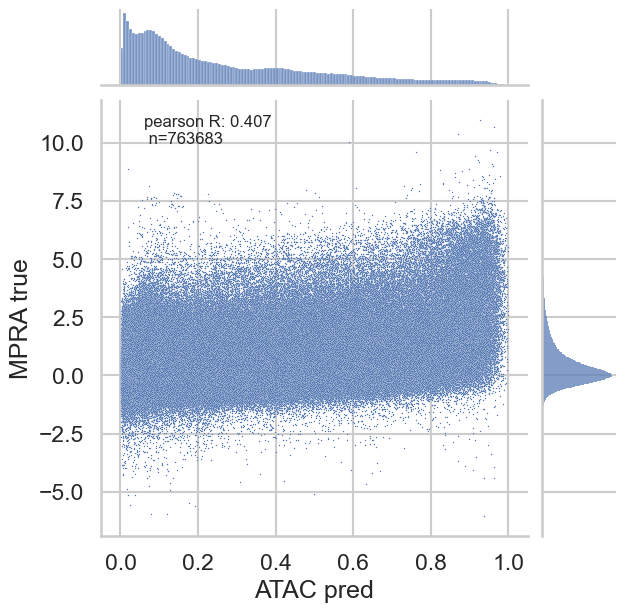

In [64]:
r = pearsonr(x=y_pred_list, y=y_true_list)[0]
print(f'pearsonr: {r:.3f}')

g = sns.jointplot(x=y_pred_list, y=y_true_list, s=1)
plt.xlabel('ATAC pred')
plt.ylabel('MPRA true')
plt.text(0.1, 0.9, f'pearson R: {r:.3f} \n n={len(y_pred_list)}', transform=g.ax_joint.transAxes, fontsize=12)
plt.savefig(os.path.join(saved_dir, '1.png'), dpi=400, bbox_inches='tight')
print(pearsonr(x=y_pred_list, y=y_true_list))

pearsonr: 0.358


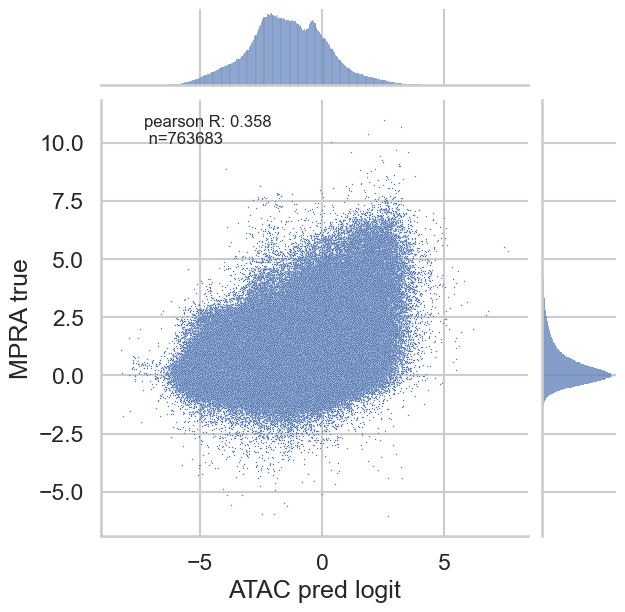

In [65]:
r = pearsonr(x=y_pred_logit_list, y=y_true_list)[0]
print(f'pearsonr: {r:.3f}')

g = sns.jointplot(x=y_pred_logit_list, y=y_true_list, s=1)
plt.xlabel('ATAC pred logit')
plt.ylabel('MPRA true')
plt.text(0.1, 0.9, f'pearson R: {r:.3f} \n n={len(y_pred_list)}', transform=g.ax_joint.transAxes, fontsize=12)
plt.savefig(os.path.join(saved_dir, '2.png'), dpi=400, bbox_inches='tight')

In [66]:
print(confusion_matrix(y_true_list>0, y_pred_list>0.5))
print(classification_report(y_true_list>0, y_pred_list>0.5))
print(roc_auc_score(y_true_list>0, y_pred_list))
print(average_precision_score(y_true_list>0, y_pred_list))

[[253025  23074]
 [371075 116509]]
              precision    recall  f1-score   support

       False       0.41      0.92      0.56    276099
        True       0.83      0.24      0.37    487584

    accuracy                           0.48    763683
   macro avg       0.62      0.58      0.47    763683
weighted avg       0.68      0.48      0.44    763683

0.6091508313632754
0.7545865331247975


In [67]:
y_pred_list = np.load(f'{saved_dir}/Gosai_designed_y_pred_list.npy')
y_true_list = np.load(f'{saved_dir}/Gosai_designed_y_true_list.npy')
print(y_pred_list.shape, y_true_list.shape)

y_pred_list = y_pred_list.reshape(-1)
y_true_list = y_true_list.reshape(-1)

y_pred_logit_list = np.log(y_pred_list / (1 - y_pred_list))

(76168, 1) (76168, 1)


pearsonr: 0.585
PearsonRResult(statistic=0.5846344055031121, pvalue=0.0)


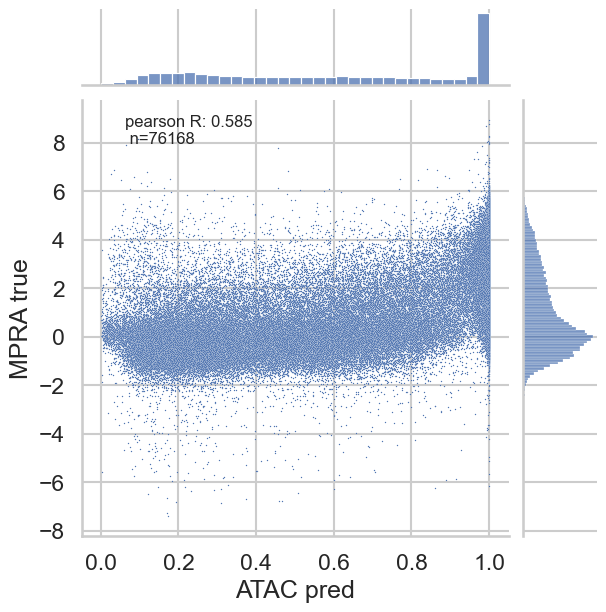

In [68]:
r = pearsonr(x=y_pred_list, y=y_true_list)[0]
print(f'pearsonr: {r:.3f}')

g = sns.jointplot(x=y_pred_list, y=y_true_list, s=1)
plt.xlabel('ATAC pred')
plt.ylabel('MPRA true')
plt.text(0.1, 0.9, f'pearson R: {r:.3f} \n n={len(y_pred_list)}', transform=g.ax_joint.transAxes, fontsize=12)
plt.savefig(os.path.join(saved_dir, '3.png'), dpi=400, bbox_inches='tight')
print(pearsonr(x=y_pred_list, y=y_true_list))

pearsonr: 0.611


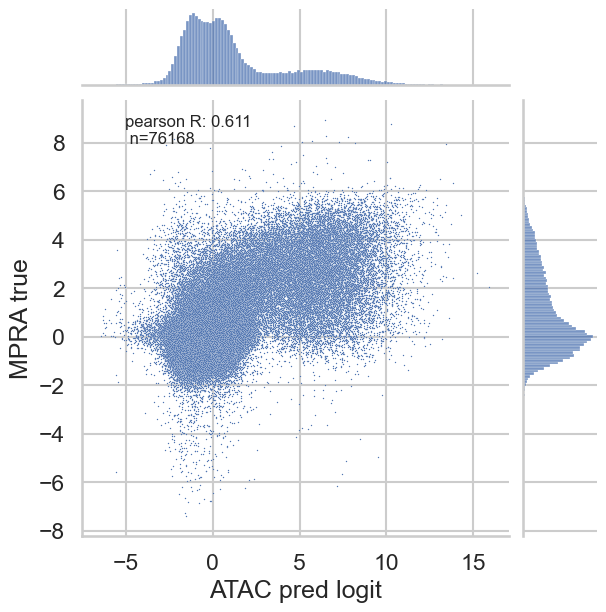

In [69]:
r = pearsonr(x=y_pred_logit_list, y=y_true_list)[0]
print(f'pearsonr: {r:.3f}')

g = sns.jointplot(x=y_pred_logit_list, y=y_true_list, s=1)
plt.xlabel('ATAC pred logit')
plt.ylabel('MPRA true')
plt.text(0.1, 0.9, f'pearson R: {r:.3f} \n n={len(y_pred_list)}', transform=g.ax_joint.transAxes, fontsize=12)
plt.savefig(os.path.join(saved_dir, '4.png'), dpi=400, bbox_inches='tight')

In [75]:
df = pd.DataFrame(columns=['HepG2_ATAC_pred', 'HepG2_MPRA_true', 'K562_ATAC_pred', 'K562_MPRA_true'])

saved_dir = 'saved/0521_ATAC/0522_095136'
df['HepG2_ATAC_pred'] = np.load(f'{saved_dir}/Gosai_designed_y_pred_list.npy').reshape(-1)
df['HepG2_MPRA_true'] = np.load(f'{saved_dir}/Gosai_designed_y_true_list.npy').reshape(-1)

saved_dir = 'saved/0521_ATAC/0522_113330'
df['K562_ATAC_pred'] = np.load(f'{saved_dir}/Gosai_designed_y_pred_list.npy').reshape(-1)
df['K562_MPRA_true'] = np.load(f'{saved_dir}/Gosai_designed_y_true_list.npy').reshape(-1)

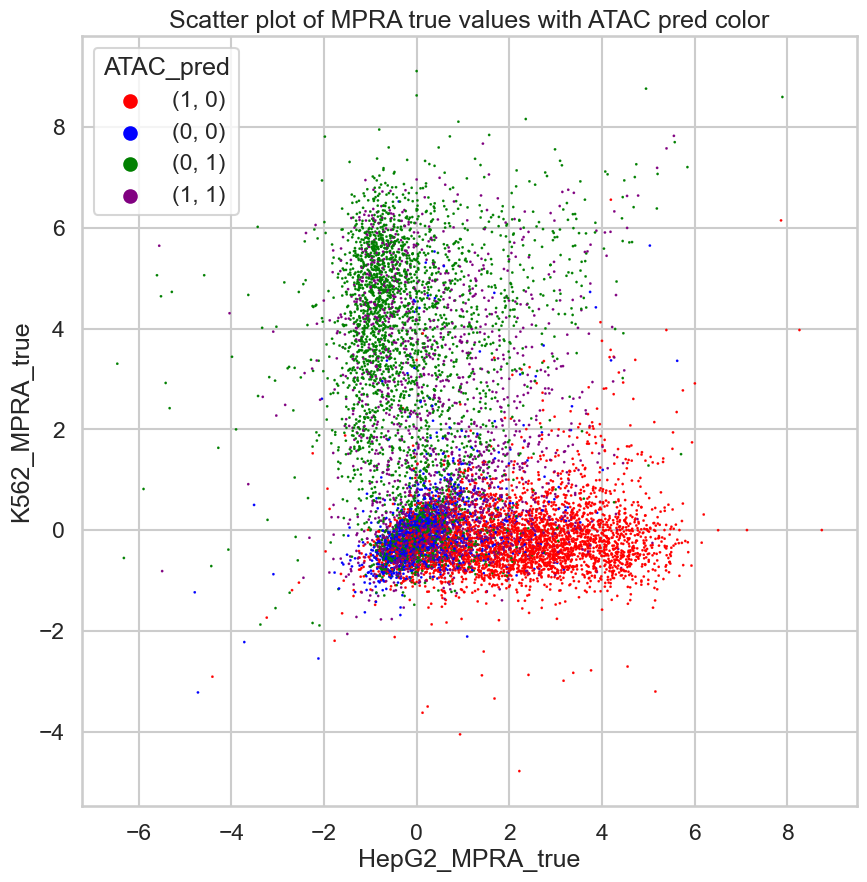

In [90]:
# 创建颜色编码列
def encode_color(row):
    return (int(row['HepG2_ATAC_pred'] > 0.5), int(row['K562_ATAC_pred'] > 0.5))

df['Color_Code'] = df.apply(encode_color, axis=1)

# 定义颜色映射
palette = {
    (0,0): 'blue',
    (0,1): 'green',
    (1,0): 'red',
    (1,1): 'purple',
}

# 绘制散点图
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df.sample(10000), x='HepG2_MPRA_true', y='K562_MPRA_true', hue='Color_Code', palette=palette, s=3, edgecolor=None)
plt.xlabel('HepG2_MPRA_true')
plt.ylabel('K562_MPRA_true')
plt.title('Scatter plot of MPRA true values with ATAC pred color')
plt.legend(title='ATAC_pred')
plt.show()

In [91]:
df

,HepG2_ATAC_pred,HepG2_MPRA_true,K562_ATAC_pred,K562_MPRA_true,Color_Code
0,0.062134,-0.582428,0.999411,4.708916,"(0, 1)"
1,0.462800,-0.554330,0.864361,5.529395,"(0, 1)"
2,0.355981,-0.202819,0.670548,-0.367307,"(0, 1)"
3,0.323238,-0.099176,0.374815,-0.237750,"(0, 0)"
4,0.036646,0.929589,0.220529,1.246627,"(0, 0)"
...,...,...,...,...,...
76163,0.874525,0.279779,0.916009,-0.092685,"(1, 1)"
76164,0.999562,3.884847,0.020806,-0.171150,"(1, 0)"
76165,0.050819,2.142409,0.894980,5.553754,"(0, 1)"
76166,0.190728,0.388042,0.186410,-0.768822,"(0, 0)"


In [ ]:
y_pred_0 = y_pred_list[np.where(task_idx_list==0)]
y_true_0 = y_true_list[np.where(task_idx_list==0)]
y_pred_1 = y_pred_list[np.where(task_idx_list==1)]
y_true_1 = y_true_list[np.where(task_idx_list==1)]
print(len(y_pred_0), len(y_true_0), len(y_pred_1), len(y_true_1))

y_pred_2 = y_pred_list[np.where(task_idx_list==2)]
y_true_2 = y_true_list[np.where(task_idx_list==2)]
y_pred_3 = y_pred_list[np.where(task_idx_list==3)]
y_true_3 = y_true_list[np.where(task_idx_list==3)]

print(len(y_pred_2), len(y_true_2), len(y_pred_3), len(y_true_3))

In [ ]:
print(confusion_matrix(y_true_3, y_pred_3>0.5))
print(classification_report(y_true_3, y_pred_3>0.5))

In [ ]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_0, y=y_pred_1, s=2, hue=y_true_0)
plt.xlabel('y_pred_0')
plt.ylabel('y_pred_1')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_0')
plt.savefig('figures/1.png')
plt.show()
print(pearsonr(x=y_pred_0, y=y_pred_1))

In [ ]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_0, y=y_pred_1, s=2, hue=y_true_1)
plt.xlabel('y_pred_0')
plt.ylabel('y_pred_1')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_1')
plt.savefig('figures/2.png')
plt.show()
print(pearsonr(x=y_pred_0, y=y_pred_1))

In [ ]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_2, y=y_pred_3, s=2, hue=y_true_2)
plt.xlabel('task 2 pred')
plt.ylabel('task 3 pred')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_2')
plt.savefig('figures/3.png')
plt.show()
print(pearsonr(x=y_pred_2, y=y_pred_3))

In [ ]:
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x=y_pred_2, y=y_pred_3, s=2, hue=y_true_3)
plt.xlabel('task 2 pred')
plt.ylabel('task 3 pred')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(title='y_true_3')
plt.savefig('figures/4.png')
plt.show()
print(pearsonr(x=y_pred_2, y=y_pred_3))

In [ ]:
print(confusion_matrix(y_true_0, y_true_1))
print(confusion_matrix(y_pred_0>0.5, y_pred_1>0.5))

print(confusion_matrix(y_true_2, y_true_3))
print(confusion_matrix(y_pred_2>0.5, y_pred_3>0.5))

In [ ]:
print(classification_report(y_true_0, y_pred_0>0.5))

In [ ]:
print(classification_report(y_true_1, y_pred_1>0.5))

In [ ]:
print(classification_report(y_true_2, y_pred_2>0.5))

In [ ]:
print(classification_report(y_true_3, y_pred_3>0.5))